In [28]:
from dataclasses import dataclass

@dataclass
class PortfolioState:
    amount_usd: float = 0.0
    total_usd: float = 0.0
    total_eur: float = 0.0

In [29]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state.total_usd = state.amount_usd * 1.08
    return state

In [30]:
def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state.total_eur = state.total_usd / 1.16
    return state

In [31]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total", calc_total)
builder.add_node("convert", convert_to_eur)

builder.add_edge(START, "calc_total")
builder.add_edge("calc_total","convert")
builder.add_edge("convert", END)

graph = builder.compile()

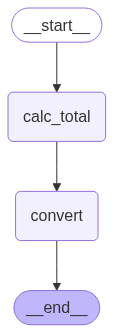

In [32]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [33]:
graph.invoke({"amount_usd": 1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_eur': 931.0344827586207}